# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [26]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [83]:
#  1. Get the total rides for each city type
Total_Rides = pyber_data_df.groupby("type").count()["ride_id"]
Total_Rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [82]:
# 2. Get the total drivers for each city type
Total_Drivers = city_data_df.groupby("type").sum()["driver_count"]
Total_Drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [85]:
#  3. Get the total amount of fares for each city type
Total_Fares = pyber_data_df.groupby("type").sum()["fare"]

In [86]:
#  4. Get the average fare per ride for each city type. 
Average_Fares_per_Ride = Total_Fares/Total_Rides

In [87]:
# 5. Get the average fare per driver for each city type. 
Average_Fares_per_Drive = Total_Fares/Total_Drivers

In [90]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({"Total_Rides":Total_Rides,
                "Total_Drivers":Total_Drivers,
                "Total_Fares":Total_Fares,
                "Average_Fares_per_Ride":Average_Fares_per_Ride,
                "Average_Fares_per_Drive":Average_Fares_per_Drive

})
pyber_summary_df

,Total_Rides,Total_Drivers,Total_Fares,Average_Fares_per_Ride,Average_Fares_per_Drive
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [91]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [92]:
#  8. Format the columns.
pyber_summary_df.Total_Rides = pyber_summary_df.Total_Rides.map("{:,}".format)
pyber_summary_df.Total_Drivers = pyber_summary_df.Total_Drivers.map("{:,}".format)
pyber_summary_df.Total_Fares = pyber_summary_df.Total_Fares.map("${:,.2f}".format)
pyber_summary_df.Average_Fares_per_Ride = pyber_summary_df.Average_Fares_per_Ride.map("${:,.2f}".format)
pyber_summary_df.Average_Fares_per_Drive = pyber_summary_df.Average_Fares_per_Drive.map("${:,.2f}".format)
pyber_summary_df

,Total_Rides,Total_Drivers,Total_Fares,Average_Fares_per_Ride,Average_Fares_per_Drive
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [93]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [102]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fares_by_type_and_date = pd.DataFrame(pyber_data_df.groupby(["type","date"]).sum()["fare"])
fares_by_type_and_date.head()

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33

In [106]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.

fares_by_type_and_date = fares_by_type_and_date.reset_index()
fares_by_type_and_date.head()

,level_0,index,type,date,fare
0,0,0,Rural,2019-01-01 09:45:36,43.69
1,1,1,Rural,2019-01-02 11:18:32,52.12
2,2,2,Rural,2019-01-03 19:51:01,19.90
3,3,3,Rural,2019-01-04 03:31:26,24.88
4,4,4,Rural,2019-01-06 07:38:40,47.33


In [131]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fares_pivot = fares_by_type_and_date.pivot(index = "date", columns="type",values="fare")
fares_pivot.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [145]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fares_pivot_new = fares_pivot.loc['2019-01-01':'2019-04-29',]


In [146]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
fares_pivot_new.index = pd.to_datetime(fares_pivot_new.index)

In [147]:
# 7. Check that the datatype for the index is datetime using df.info()
fares_pivot_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [148]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fares_pivot_resample = fares_pivot_new.resample("W").sum()
fares_pivot_resample.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


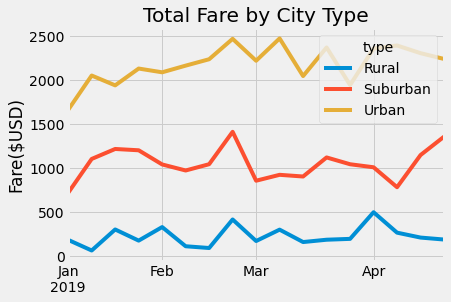

In [206]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fares_pivot_resample.plot()

plt.xlabel("")
# Create a title.
plt.title("Total Fare by City Type")

# Create labels for the x and y axes.
plt.ylabel("Fare($USD)")
plt.savefig('PyBer_fare_summary.png')